# Basic Hand Gestures Classification Based on Surface Electromyography (SEMG)

Utilizaremos o método CRISP-DM para realizar a tarefa de classificação dos dados a seguir:

https://archive.ics.uci.edu/ml/datasets/sEMG+for+Basic+Hand+movements




## Compreensão dos dados e preparação dos dados

### Importação de bibliotecas

In [1]:
import numpy as np
from scipy.io import loadmat  
import matplotlib.pyplot as plt
from datetime import datetime, date, time
import pandas as pd
#from google.colab import drive
import missingno as msno
import seaborn as sns
from matplotlib.ticker import PercentFormatter
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import random
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from scipy.stats import sem
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

#drive.mount('/content/gdrive')



### Importando e formatando os dados

Nessa seção iremos importar e formatar os dados, o repositório do UCI os disponibiliza em formato .mat, portanto devemos transformar esses dados para que possam ser utilizados com a biblioteca pandas do python

In [2]:
#matfile = '/content/gdrive/My Drive/data/female_1.mat'
matfile = 'data/female_1.mat'
mat = loadmat(matfile)
print(mat)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Nov 18 12:16:25 2014', '__version__': '1.0', '__globals__': [], 'cyl_ch1': array([[ 0.072198,  0.276211,  0.429221, ..., -2.528968,  0.0977  ,
         0.837247],
       [ 0.25071 ,  0.301713,  0.199706, ..., -0.616346,  0.454723,
         0.021195],
       [ 0.123201,  0.148703,  0.148703, ..., -0.36133 ,  0.505726,
         0.607732],
       ...,
       [ 0.531228,  0.072198, -0.20832 , ...,  2.571358,  0.301713,
         0.123201],
       [-0.947867,  1.117765,  1.959319, ...,  0.225208,  0.735241,
         1.321778],
       [ 0.148703,  0.148703,  0.454723, ...,  1.015759,  0.735241,
        -0.106313]]), 'cyl_ch2': array([[ 0.202185,  0.278708,  0.100154, ...,  0.584801,  0.508278,
        -0.256954],
       [ 0.227693,  0.125662,  0.049139, ...,  0.125662, -0.588555,
        -0.052892],
       [ 0.227693,  0.125662,  0.023631, ...,  0.074646,  0.100154,
         0.023631],
       ...,
       [ 0.227693,  0.2

Aqui podemos observar que cada classe (isto é cada movimento da mão) possui 2 caracteristicas, a ch1 e a ch2. Portanto temos 2 colunas de características e 1 coluna que possui a classe do dado neste dataset. No entanto iremos adicionar mais uma coluna, esta referente ao gênero do participante sendo 0 feminino e 1 masculino, pois é uma informação que temos pelos dados, poderemos retirá-la mais tarde caso não seja útil.

In [3]:

def load_mat_file(matfile):
  mat = loadmat(matfile)  # load mat-file
  
  df_final = pd.DataFrame()
  df_list = []
  for key, value in mat.items():

    df = pd.DataFrame()
    if key not in ["__globals__", "__header__", "__version__"]:
      k = str(key)
      k = k.split("_")
      df[k[1]] = value[0]
      df["hand_mov"] = k[0]
      df_list.append(df)
  
  i = 0
  while i < len(df_list):
    df_temp = pd.concat([df_list[i], df_list[i + 1]], axis=1)
    df_final = pd.concat([df_final, df_temp])
    i = i + 2

  df_final = df_final.loc[:,~df_final.columns.duplicated()]
  df_final = df_final[['ch1', 'ch2', 'hand_mov']]
  return df_final

#matfile = '/content/gdrive/My Drive/data/female_1.mat'
matfile = 'data/female_1.mat'
df = load_mat_file(matfile)
df['gender'] = 0.0 # 0 sendo mulher, 1 sendo homem
df = df[['ch1', 'ch2', 'gender','hand_mov']]
df.head()

,ch1,ch2,gender,hand_mov
0,0.072198,0.202185,0.0,cyl
1,0.276211,0.278708,0.0,cyl
2,0.429221,0.100154,0.0,cyl
3,0.327214,0.100154,0.0,cyl
4,0.123201,0.151170,0.0,cyl


### Juntando todos os dados dos 5 participantes

In [4]:

#matfile = '/content/gdrive/My Drive/data/female_2.mat'
matfile = 'data/female_2.mat'
df1 = load_mat_file(matfile)
df1['gender'] = 0.0 # 0 sendo mulher, 1 sendo homem
df1 = df1[['ch1', 'ch2', 'gender','hand_mov']]

#matfile = '/content/gdrive/My Drive/data/female_3.mat'
matfile = 'data/female_3.mat'
df2 = load_mat_file(matfile)
df2['gender'] = 0.0 # 0 sendo mulher, 1 sendo homem
df2 = df2[['ch1', 'ch2', 'gender','hand_mov']]

#matfile = '/content/gdrive/My Drive/data/male_1.mat'
matfile = 'data/male_1.mat'
df3 = load_mat_file(matfile)
df3['gender'] = 1.0 # 0 sendo mulher, 1 sendo homem
df3 = df3[['ch1', 'ch2', 'gender','hand_mov']]

#matfile = '/content/gdrive/My Drive/data/male_2.mat'
matfile = 'data/male_2.mat'

df4 = load_mat_file(matfile)
df4['gender'] = 1.0 # 0 sendo mulher, 1 sendo homem
df4 = df4[['ch1', 'ch2', 'gender','hand_mov']]

matfile = 'data/male_day_1.mat'
day1 = load_mat_file(matfile)
day1 = day1[['ch1', 'ch2','hand_mov']]

matfile = 'data/male_day_2.mat'
day2 = load_mat_file(matfile)
day2 = day2[['ch1', 'ch2','hand_mov']]

matfile = 'data/male_day_3.mat'
day3 = load_mat_file(matfile)
day3 = day3[['ch1', 'ch2','hand_mov']]

#df_all =  pd.concat([day2, day1, day3])
df_all = df
df_all = df_all.drop(["gender"], axis=1)

df_all.head()

,ch1,ch2,hand_mov
0,0.072198,0.202185,cyl
1,0.276211,0.278708,cyl
2,0.429221,0.100154,cyl
3,0.327214,0.100154,cyl
4,0.123201,0.151170,cyl


## Analise de estatística descritiva dos dados

In [5]:
df_all.shape

(18000, 3)

In [6]:
df_all.describe() 

,ch1,ch2
count,18000.000000,18000.000000
mean,0.140630,0.142320
std,0.694870,0.308123
min,-8.292338,-2.603667
25%,-0.080812,0.049139
50%,0.148703,0.151170
75%,0.403719,0.253201
max,4.152459,2.854991


In [7]:
df_all.describe() 

,ch1,ch2
count,18000.000000,18000.000000
mean,0.140630,0.142320
std,0.694870,0.308123
min,-8.292338,-2.603667
25%,-0.080812,0.049139
50%,0.148703,0.151170
75%,0.403719,0.253201
max,4.152459,2.854991


In [8]:
df_all.dtypes

ch1         float64
ch2         float64
hand_mov     object
dtype: object

### Dados Nulos

Sempre é importante verificar se existem dados nulos em um conjunto de dados, para que seja feito seu tratamento ou sua retirada, caso seja necessário.

<AxesSubplot:>

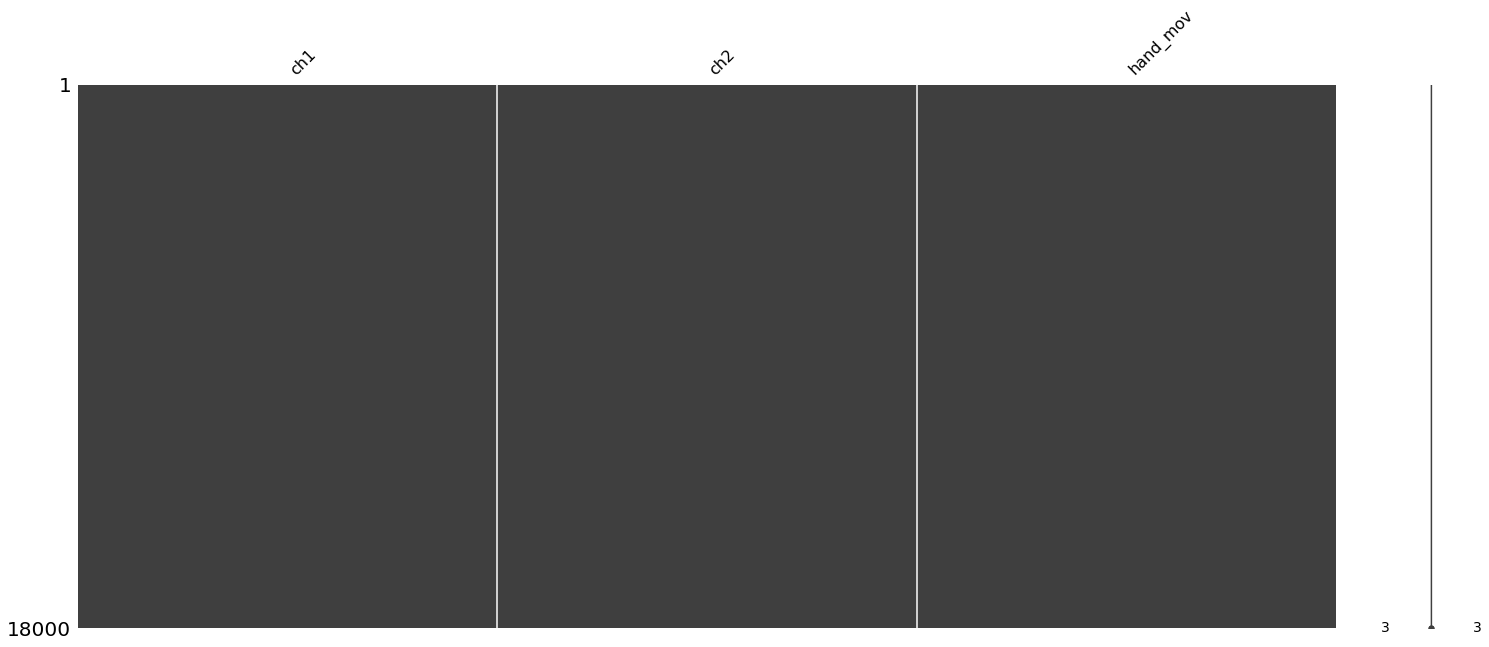

In [9]:
msno.matrix(df_all)

No entanto aqui observamos que não há dados nulos nesse conjunto.

### Distribuição das classes

In [10]:
# Distribuição das classes
df_all[['hand_mov']].groupby('hand_mov')['hand_mov'].count() # Contando a quantidade de classes e suas respectivas quantidades

hand_mov
cyl      3000
hook     3000
lat      3000
palm     3000
spher    3000
tip      3000
Name: hand_mov, dtype: int64

<AxesSubplot:>

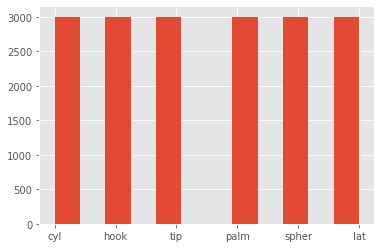

In [11]:
plt.style.use('ggplot')
plt.hist(df_all["hand_mov"],bins=12)
plt.gca()

Temos 6 classes nesse dataset, sendo elas nomeadas como: cyl, hook, tip, palm, spher e lat. Podemos observar que as classes são perfeitamente balanceadas, portanto não há necessidade de qualquer técnica de subsampling ou resampling.

### Matriz de correlação

A correlação é uma estatística muito comum e muito utilizada para analisar se há ligações entre variáveis ou se algum parâmetro pode ser um bom preditor para outro, portanto, tendo em mente que não se pode concluir que correlação implica em causualidade, é interessante plotar a matriz de correlação das variáveis do dataset.

In [12]:
corr = df_all.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(9)

,ch1,ch2
ch1,1.000000000,0.116943834
ch2,0.116943834,1.000000000


Não há correlação relevante entre as variáveis contínuas e a variável categórica de 2 valores que temos no nosso dataset. Não é possível calcular a correlação quando temos uma variável categórica com mais de 2 classes, no entanto podemos realizar um procedimento chamado one-hot-encoding e avaliar a correlação entre as variáveis contínuas e as variáveis criadas com a transformação da categórica. 

Isto é, iremos avaliar se ch1 e ch2 tem correlação com o fato de uma linha ser classificada como cyl ou não, ou se possuem correlação com a classificação de hook ou não, por exemplo.

In [13]:
df_all_ohe = pd.get_dummies(df_all, prefix='hand_mov')
print(df_all_ohe.head())

        ch1       ch2  hand_mov_cyl  hand_mov_hook  hand_mov_lat  \
0  0.072198  0.202185             1              0             0   
1  0.276211  0.278708             1              0             0   
2  0.429221  0.100154             1              0             0   
3  0.327214  0.100154             1              0             0   
4  0.123201  0.151170             1              0             0   

   hand_mov_palm  hand_mov_spher  hand_mov_tip  
0              0               0             0  
1              0               0             0  
2              0               0             0  
3              0               0             0  
4              0               0             0  


One-hot Encoding é um tipo de representação vetorial em que todos os elementos de um vetor são 0, exceto um, que tem como valor 1, onde 1 representa um booleano especificando uma categoria do elemento. Por exemplo no conjunto de dados a coluna hand_mov_palm só tera 1 onde a classe for palm. Ele representa a existência ou não dessa classificação, essa é uma maneira de representar variáveis categóricas como números sem denotar uma ordem de importância entre elas.

In [14]:
corr = df_all_ohe.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(9)

,ch1,ch2,hand_mov_cyl,hand_mov_hook,hand_mov_lat,hand_mov_palm,hand_mov_spher,hand_mov_tip
ch1,1.000000000,0.116943834,0.000266263,0.000703954,0.000244365,0.000517915,-0.000986603,-0.000745893
ch2,0.116943834,1.000000000,-0.000853050,0.002405855,0.000844977,-0.000356667,-0.001890611,-0.000150503
hand_mov_cyl,0.000266263,-0.000853050,1.000000000,-0.200000000,-0.200000000,-0.200000000,-0.200000000,-0.200000000
hand_mov_hook,0.000703954,0.002405855,-0.200000000,1.000000000,-0.200000000,-0.200000000,-0.200000000,-0.200000000
hand_mov_lat,0.000244365,0.000844977,-0.200000000,-0.200000000,1.000000000,-0.200000000,-0.200000000,-0.200000000
hand_mov_palm,0.000517915,-0.000356667,-0.200000000,-0.200000000,-0.200000000,1.000000000,-0.200000000,-0.200000000
hand_mov_spher,-0.000986603,-0.001890611,-0.200000000,-0.200000000,-0.200000000,-0.200000000,1.000000000,-0.200000000
hand_mov_tip,-0.000745893,-0.000150503,-0.200000000,-0.200000000,-0.200000000,-0.200000000,-0.200000000,1.000000000


Podemos concluir nossa observação, não há correlação relevante entre os preditores e as classes.

### Visualização dos dados

<Figure size 576x576 with 0 Axes>

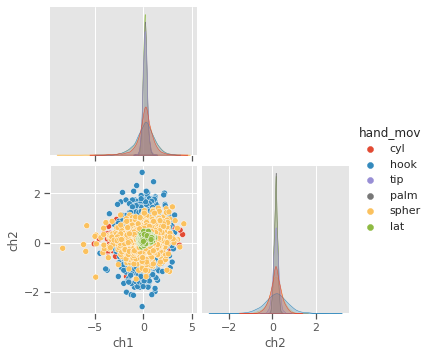

In [15]:
variaveis_pertinentes = df_all
sns.set(style="ticks", color_codes=True)
plt.style.use('ggplot')
# Plotando a distribuição em pares das variáveis 
plt.figure(figsize=(8,8))
sns.pairplot(variaveis_pertinentes, hue="hand_mov", corner=True, diag_kind="kde")
plt.show()

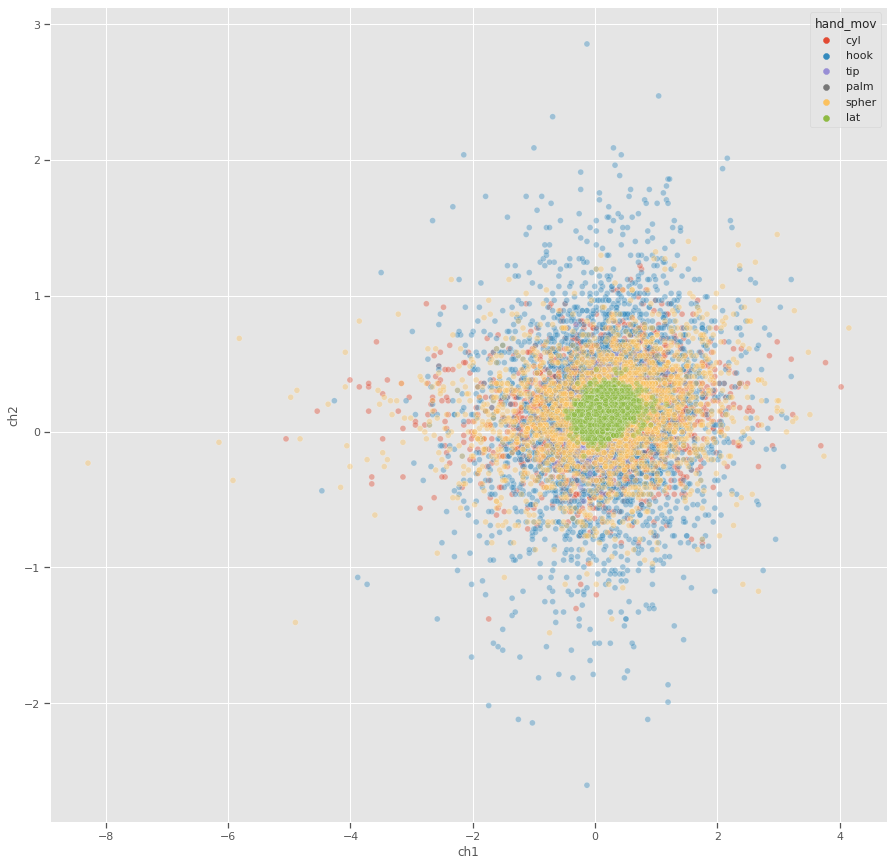

In [16]:

fig, ax = plt.subplots(1,1,figsize=(15,15))

sns.scatterplot(x="ch1", y="ch2", hue=df_all['hand_mov'], data=df_all, ax=ax, alpha=0.4)

plt.show()

Com essas visualizações é possível observar que esse problema não é linearmente separável. Um problema linearmente separável se dá quando existe um hiperplano que separa perfeitamente duas classes, assim chamamos as classes linearmente separáveis. Classificadores Lineares funcionam bem no caso de estarmos lidando com um problema linearmente separável, nesse caso precisam de um critério para selecionar entre todos os hiperplanos de decisão que separam perfeitamente os dados de treinamento. 

Se um problema é não linear e seus limites de classe não podem ser bem aproximados com hiperplanos lineares,  o que parece ser o caso do problema em questão, os classificadores não lineares geralmente são mais precisos que os classificadores lineares. Portanto um bom ponto de partida para realizar a classificação nesse problema seria o k-NN.


### Tratamento de outliers



In [17]:
cyl = df_all.loc[df_all['hand_mov'] == 'cyl']
hook = df_all.loc[df_all['hand_mov'] == 'hook']
tip = df_all.loc[df_all['hand_mov'] == 'tip']
palm = df_all.loc[df_all['hand_mov'] == 'palm']
spher = df_all.loc[df_all['hand_mov'] == 'spher']
lat = df_all.loc[df_all['hand_mov'] == 'lat']


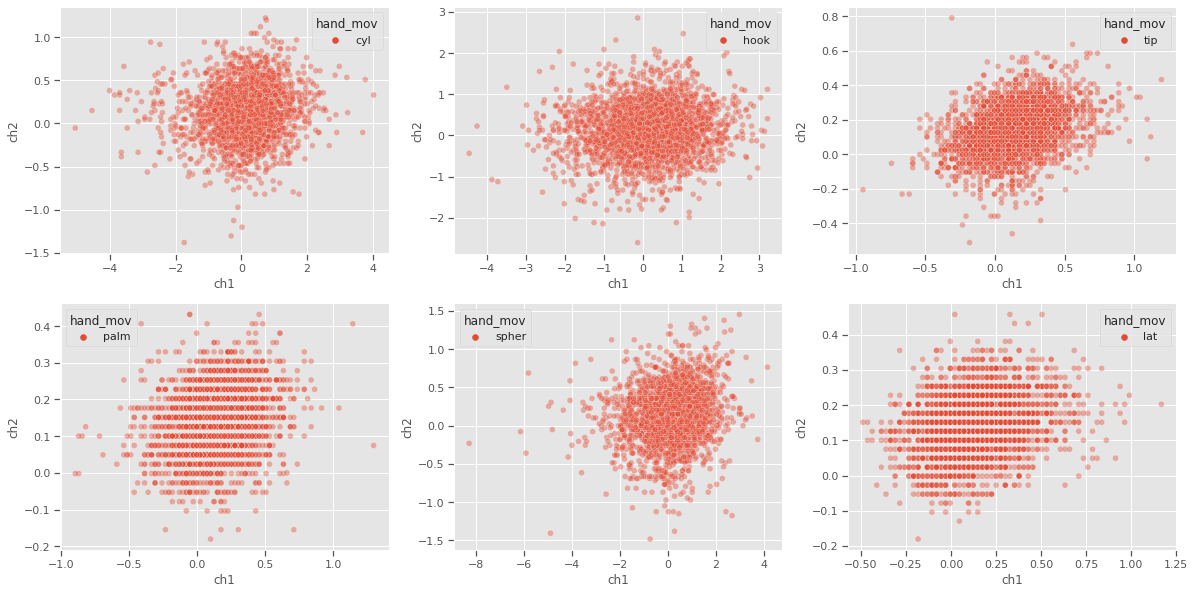

In [18]:
fig, ax = plt.subplots(2,3,figsize=(20,10))

sns.scatterplot(x="ch1", y="ch2", hue=cyl['hand_mov'], data=cyl, ax=ax[0][0], alpha=0.4)
sns.scatterplot(x="ch1", y="ch2", hue=hook['hand_mov'], data=hook, ax=ax[0][1], alpha=0.4)
sns.scatterplot(x="ch1", y="ch2", hue=tip['hand_mov'], data=tip, ax=ax[0][2], alpha=0.4)

sns.scatterplot(x="ch1", y="ch2", hue=palm['hand_mov'], data=palm, ax=ax[1][0], alpha=0.4)
sns.scatterplot(x="ch1", y="ch2", hue=spher['hand_mov'], data=spher, ax=ax[1][1], alpha=0.4)
sns.scatterplot(x="ch1", y="ch2", hue=lat['hand_mov'], data=lat, ax=ax[1][2], alpha=0.4)

plt.show()

Ao observar os gráficos acima podemos notar a existência de alguns pontos bem distantes do conglomerado que compõe majoritariamente cada classe, portanto nesse conjunto de dados temos outliers que podem enviesar o processo de classificação. Para tratar os outliers usaremos o método IsolationForest.

### IsolationForest

É um algoritmo de detecção de anomalias baseado em árvores, baseia-se na modelação dos dados normais de modo a isolar anomalias que são simultaneamente poucas em número e diferentes no espaço de características.

Talvez o hiperparâmetro mais importante no modelo seja o argumento da "contaminação", que é utilizado para ajudar a estimar o número de outliers no conjunto de dados. Este é um valor entre 0,0 e 0,5 e, por padrão, é fixado em 0,1.


In [19]:
from sklearn.ensemble import IsolationForest

def create_X_y_df(df):
  # retrieve the array
  data = df.values
  # split into input and output elements
  X, y = data[:, :-1], data[:, -1]
  # split into train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
  # summarize the shape of the train and test sets
  return X_train, X_test, y_train, y_test 


X_train, X_test, y_train, y_test = create_X_y_df(df_all)
print("Tamanho do X_train antes de remover os outliers: {}".format(X_train.shape))



Tamanho do X_train antes de remover os outliers: (12060, 2)


### Gráficos do X_train antes de remover os outliers

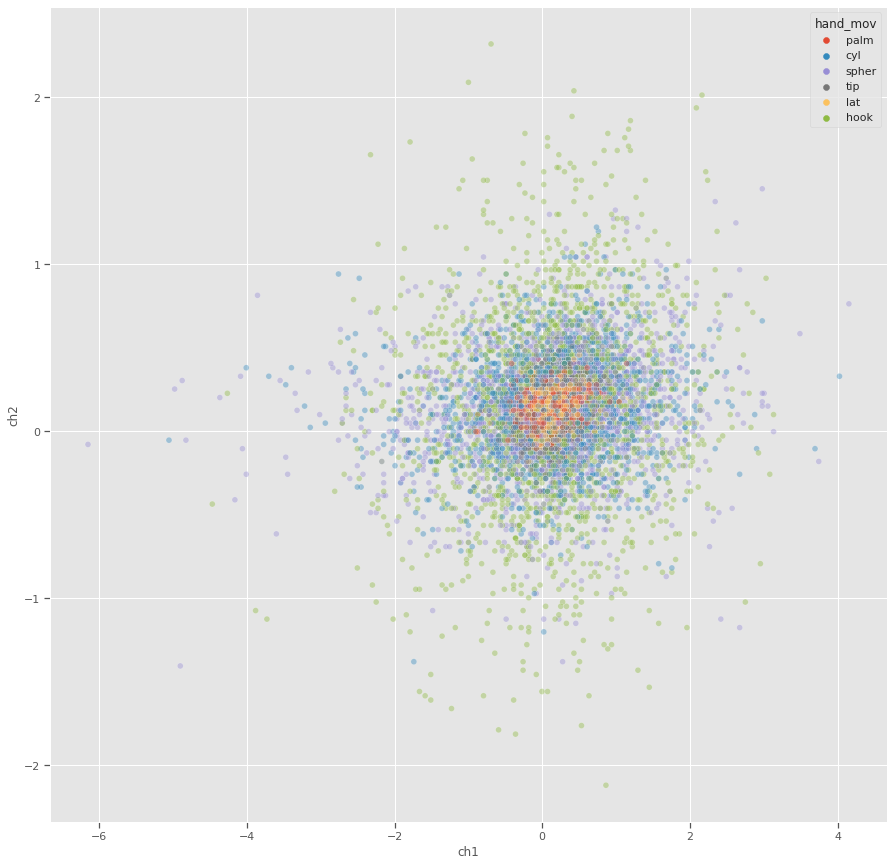

In [20]:
df_train = pd.DataFrame(columns=df_all.columns)

df_train['hand_mov'] = y_train
df_train[['ch1','ch2']] = X_train


fig, ax = plt.subplots(1,1,figsize=(15,15))

sns.scatterplot(x="ch1", y="ch2", hue=df_train['hand_mov'], data=df_train, ax=ax, alpha=0.4)

plt.show()

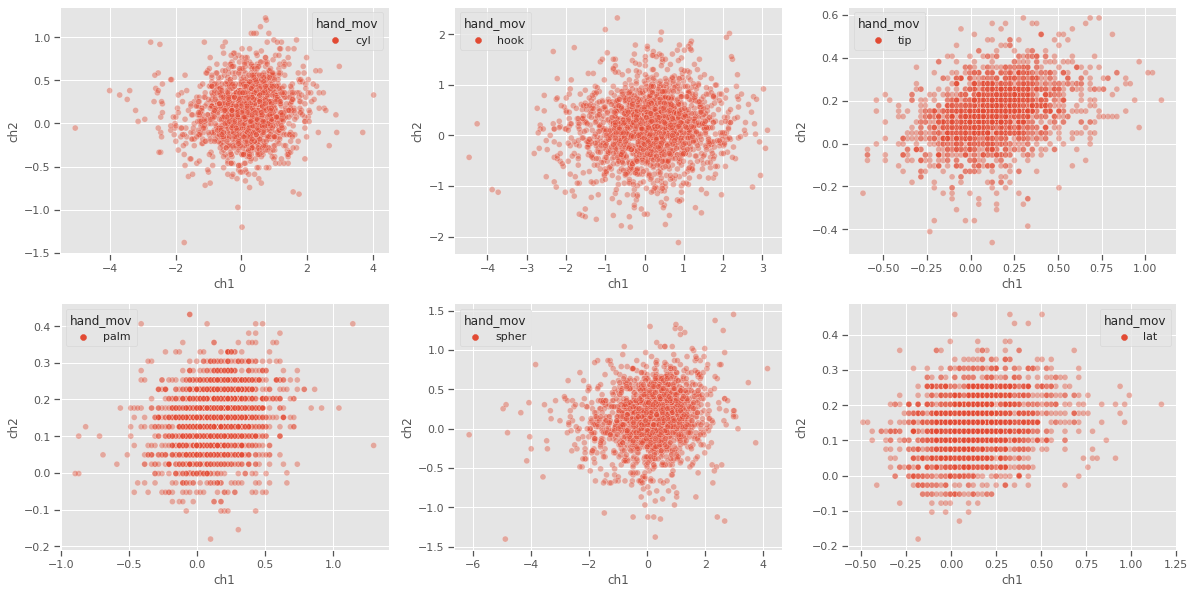

In [21]:
cyl = df_train.loc[df_train['hand_mov'] == 'cyl']
hook = df_train.loc[df_train['hand_mov'] == 'hook']
tip = df_train.loc[df_train['hand_mov'] == 'tip']
palm = df_train.loc[df_train['hand_mov'] == 'palm']
spher = df_train.loc[df_train['hand_mov'] == 'spher']
lat = df_train.loc[df_train['hand_mov'] == 'lat']

fig, ax = plt.subplots(2,3,figsize=(20,10))

sns.scatterplot(x="ch1", y="ch2", hue=cyl['hand_mov'], data=cyl, ax=ax[0][0], alpha=0.4)
sns.scatterplot(x="ch1", y="ch2", hue=hook['hand_mov'], data=hook, ax=ax[0][1], alpha=0.4)
sns.scatterplot(x="ch1", y="ch2", hue=tip['hand_mov'], data=tip, ax=ax[0][2], alpha=0.4)

sns.scatterplot(x="ch1", y="ch2", hue=palm['hand_mov'], data=palm, ax=ax[1][0], alpha=0.4)
sns.scatterplot(x="ch1", y="ch2", hue=spher['hand_mov'], data=spher, ax=ax[1][1], alpha=0.4)
sns.scatterplot(x="ch1", y="ch2", hue=lat['hand_mov'], data=lat, ax=ax[1][2], alpha=0.4)

plt.show()

In [22]:
# identify outliers in the training dataset
iso = IsolationForest(contamination=0.03)
yhat = iso.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]

print("Tamanho do X_train após remover os outliers: {}".format(X_train.shape))

Tamanho do X_train após remover os outliers: (11698, 2)


### Gráficos do X_train após remover os outliers

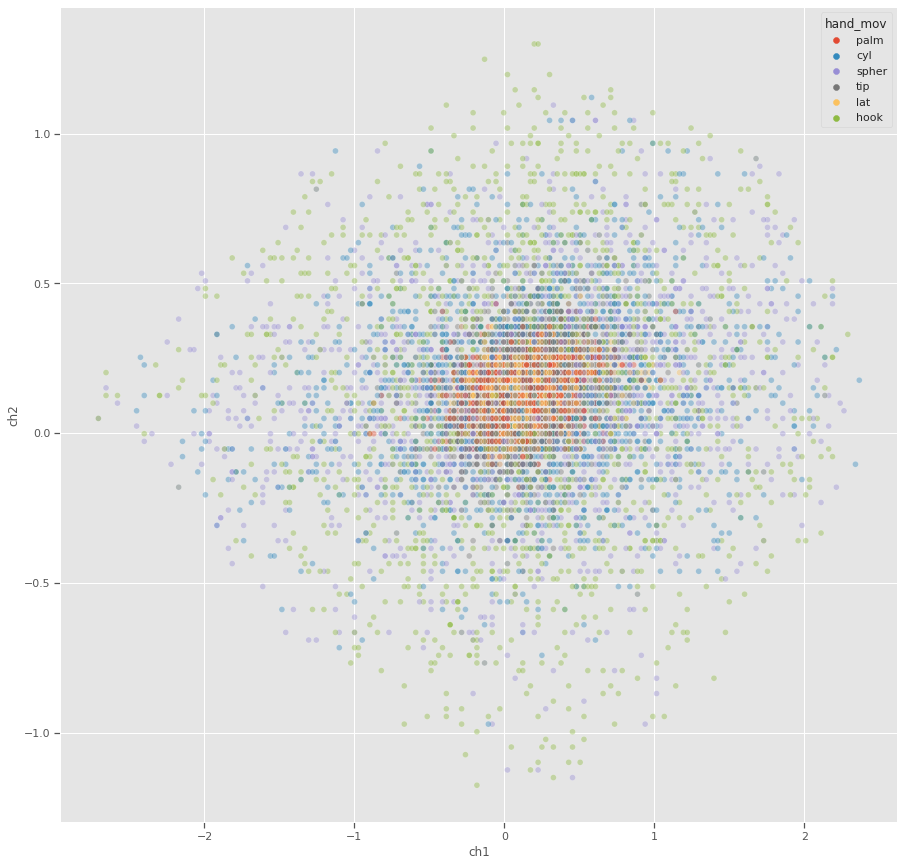

In [23]:

df_train = pd.DataFrame(columns=df_all.columns)

df_train['hand_mov'] = y_train
df_train[['ch1','ch2']] = X_train


fig, ax = plt.subplots(1,1,figsize=(15,15))

sns.scatterplot(x="ch1", y="ch2", hue=df_train['hand_mov'], data=df_train, ax=ax, alpha=0.4)

plt.show()

In [24]:
cyl = df_train.loc[df_train['hand_mov'] == 'cyl']
hook = df_train.loc[df_train['hand_mov'] == 'hook']
tip = df_train.loc[df_train['hand_mov'] == 'tip']
palm = df_train.loc[df_train['hand_mov'] == 'palm']
spher = df_train.loc[df_train['hand_mov'] == 'spher']
lat = df_train.loc[df_train['hand_mov'] == 'lat']


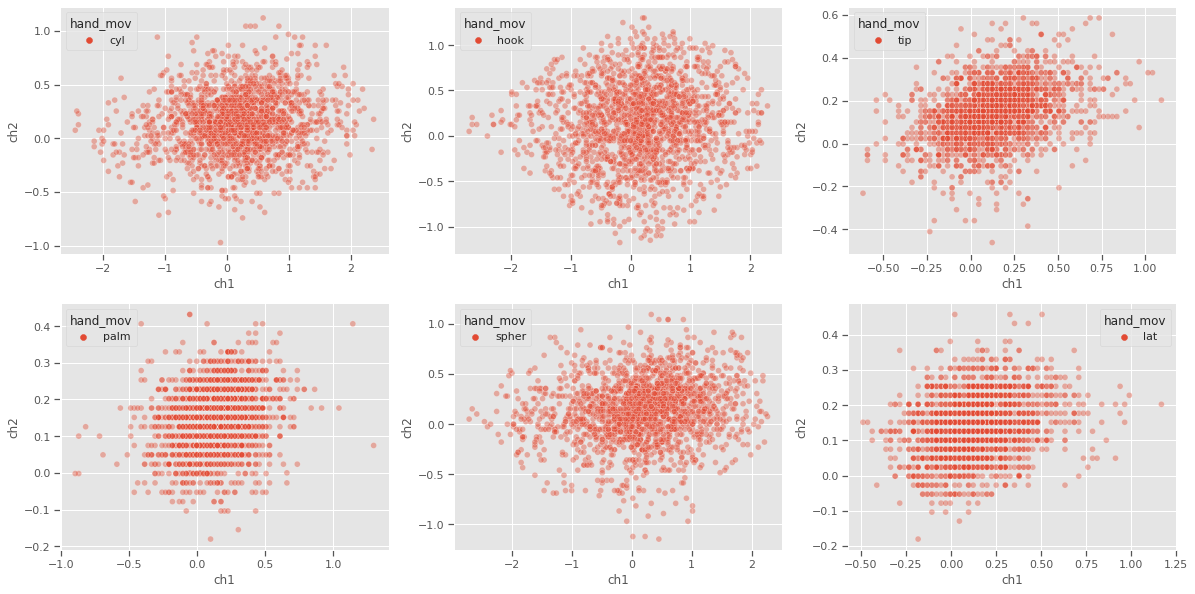

In [25]:
fig, ax = plt.subplots(2,3,figsize=(20,10))

sns.scatterplot(x="ch1", y="ch2", hue=cyl['hand_mov'], data=cyl, ax=ax[0][0], alpha=0.4)
sns.scatterplot(x="ch1", y="ch2", hue=hook['hand_mov'], data=hook, ax=ax[0][1], alpha=0.4)
sns.scatterplot(x="ch1", y="ch2", hue=tip['hand_mov'], data=tip, ax=ax[0][2], alpha=0.4)

sns.scatterplot(x="ch1", y="ch2", hue=palm['hand_mov'], data=palm, ax=ax[1][0], alpha=0.4)
sns.scatterplot(x="ch1", y="ch2", hue=spher['hand_mov'], data=spher, ax=ax[1][1], alpha=0.4)
sns.scatterplot(x="ch1", y="ch2", hue=lat['hand_mov'], data=lat, ax=ax[1][2], alpha=0.4)

plt.show()

Após aplicar o método de detecção de outliers é possível verificar uma diminuição dos "pontos soltos" nos gráficos de dispersão que representam os dados. Apenas poderemos confirmar se a retirada dos outliers melhora o desempenho do modelo ao realizar testes com um modelo baseline e um modelo que possui detecção de outliers.

## Funções Auxiliares

### KFold

In [26]:
def KFolds_outlier(df_all, model):
  outlier_list = []
  normal_list = []

  normal_conf_matrix = []
  outlier_conf_matrix = []

  df = shuffle(df_all)
  data = df.values
  X, y = data[:, :-1], data[:, -1]

  i = 0
  kf = KFold(n_splits=10,random_state=11, shuffle=True)
  kf.get_n_splits(X)

  print(kf)

  for train_index, test_index in kf.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    i = i + 1
    
  
    print("--------------------------------------------------------")
    print("Fold número: ", i)
    print("Tamanho do X_train antes de remover os outliers: {}".format(X_train.shape))

    modelo = model
    modelo.fit(X_train,y_train)

    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred, labels=["cyl", "hook", "tip", "palm", "spher", "lat"])
    print("Acurácia antes retirada de outliers: ", acc)
    normal_list.append(acc)
    normal_conf_matrix.append(conf_matrix)

    # identify outliers in the training dataset
    iso = IsolationForest(contamination=0.03)
    yhat = iso.fit_predict(X_train)
    # select all rows that are not outliers
    mask = yhat != -1
    X_train, y_train = X_train[mask, :], y_train[mask]
    
    print("Tamanho do X_train após remover os outliers: {}".format(X_train.shape))

    modelo = model
    modelo.fit(X_train,y_train)

    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred, labels=["cyl", "hook", "tip", "palm", "spher", "lat"])
    print("Acurácia após retirada de outliers: ", acc)
    outlier_list.append(acc)
    outlier_conf_matrix.append(conf_matrix)

  return normal_list, outlier_list, normal_conf_matrix, outlier_conf_matrix

### GridSearch

In [27]:
def grid_search(model, param_grid, n_folds, X, y):
  #use gridsearch to test all values for n_neighbors
  gscv = GridSearchCV(model, param_grid, cv=n_folds, verbose = 2)
  #fit model to data
  gscv.fit(X, y)
  return gscv.best_params_, gscv.best_score_


### Boxplot

In [28]:
def boxplot_results(normal_list, outlier_list):
  results_kfold = pd.DataFrame()
  results_kfold["mean"] = normal_list
  results_kfold["method"] = "with outliers"

  results_kfold1 = pd.DataFrame()
  results_kfold1["mean"] = outlier_list
  results_kfold1["method"] = "without outliers"

  results_kfold = pd.concat([results_kfold,results_kfold1])
  results_kfold.head()

  fig, ax = plt.subplots(figsize=(12,10)) 
  ax = sns.boxplot(x="method", y="mean", hue="method", data=results_kfold, palette="Set1")
  plt.show()

### Confusion Matrix

In [29]:
def conf_matrix(conf_matrix, list_scores):
  index_best = list_scores.index(max(list_scores))
  conf_matrix_best = conf_matrix[index_best]

  fig, ax = plt.subplots(figsize=(15,10)) 
  sns.set(font_scale=1.4) # for label size
  sns.heatmap(conf_matrix_best, annot=True, annot_kws={"size": 10}) # font size

  plt.show()

### Repeated KFold

In [30]:
# evaluate a model with a given number of repeats
def evaluate_model(X, y, repeats, model):
	# prepare the cross-validation procedure
	cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=11)
	# create model
	model = model
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

def repeated_KFold(model, df_all):
  # create datasetdata = df_all.values
  data = df_all.values
  X, y = data[:, :-1], data[:, -1]
  # configurations to test
  repeats = range(1,10)
  results = list()
  modelo = model

  for r in repeats:
    # evaluate using a given number of repeats
    scores = evaluate_model(X, y, r, modelo)
    # summarize
    print('>%d mean=%.4f std=%.3f' % (r, mean(scores), std(scores)))
    # store
    results.append(scores)
  # plot the results
  pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
  pyplot.show()


  mean_scores = []
  for i in results:
    mean_scores.append(mean(i))
  best_score = np.amax(mean_scores)

  return best_score

### Avaliação modelo

In [31]:
def evaluate(model, test_features, test_labels):
    y_pred = model.predict(test_features)
    acc = accuracy_score(test_labels, y_pred)
    conf_matrix = confusion_matrix(test_labels, y_pred, labels=["cyl", "hook", "tip", "palm", "spher", "lat"])
    print('Model Performance')
    print('Accuracy = {:0.5f}%.'.format(acc))
    
    return acc, conf_matrix

# Algoritmos de Classificação

In [32]:
dict_results = {}

## KNN

### Modelo baseline

In [33]:
X_train, X_test, y_train, y_test = create_X_y_df(df_all)

print("Modelo baseline")
base_model = KNeighborsClassifier()
base_model.fit(X_train, y_train)
base_accuracy, base_conf_matrix = evaluate(base_model, X_test, y_test)

dict_results['knn_baseline'] = base_accuracy


Modelo baseline
Model Performance
Accuracy = 0.29428%.


### Grid Search para achar melhor n de k

In [34]:

data = df_all.values
X, y = data[:, :-1], data[:, -1]

knn = KNeighborsClassifier()
best_params, best_score = grid_search(knn, {'n_neighbors': np.arange(21, 50, 2)},10, X,y)

Fitting 10 folds for each of 15 candidates, totalling 150 fits
[CV] END .....................................n_neighbors=21; total time=   0.1s
[CV] END .....................................n_neighbors=21; total time=   0.1s
[CV] END .....................................n_neighbors=21; total time=   0.1s
[CV] END .....................................n_neighbors=21; total time=   0.1s
[CV] END .....................................n_neighbors=21; total time=   0.1s
[CV] END .....................................n_neighbors=21; total time=   0.1s
[CV] END .....................................n_neighbors=21; total time=   0.1s
[CV] END .....................................n_neighbors=21; total time=   0.1s
[CV] END .....................................n_neighbors=21; total time=   0.1s
[CV] END .....................................n_neighbors=21; total time=   0.1s
[CV] END .....................................n_neighbors=23; total time=   0.1s
[CV] END .....................................

[CV] END .....................................n_neighbors=41; total time=   0.1s
[CV] END .....................................n_neighbors=41; total time=   0.1s
[CV] END .....................................n_neighbors=41; total time=   0.1s
[CV] END .....................................n_neighbors=41; total time=   0.1s
[CV] END .....................................n_neighbors=41; total time=   0.1s
[CV] END .....................................n_neighbors=41; total time=   0.1s
[CV] END .....................................n_neighbors=41; total time=   0.1s
[CV] END .....................................n_neighbors=41; total time=   0.1s
[CV] END .....................................n_neighbors=41; total time=   0.1s
[CV] END .....................................n_neighbors=43; total time=   0.1s
[CV] END .....................................n_neighbors=43; total time=   0.1s
[CV] END .....................................n_neighbors=43; total time=   0.1s
[CV] END ...................

In [35]:
#check mean score for the top performing value of n_neighbors
best_score

0.33144444444444443

In [36]:
#check top performing n_neighbors value
knn_best = best_params
print("Melhores parâmetros: {}".format(knn_best))

Melhores parâmetros: {'n_neighbors': 43}


### K-fold com e sem a retirada de outliers

In [37]:
knn = KNeighborsClassifier(**knn_best)
normal_list, outlier_list, normal_conf_matrix, outlier_conf_matrix = KFolds_outlier(df_all, knn)

KFold(n_splits=10, random_state=11, shuffle=True)
--------------------------------------------------------
Fold número:  1
Tamanho do X_train antes de remover os outliers: (16200, 2)
Acurácia antes retirada de outliers:  0.3327777777777778
Tamanho do X_train após remover os outliers: (15715, 2)
Acurácia após retirada de outliers:  0.32055555555555554
--------------------------------------------------------
Fold número:  2
Tamanho do X_train antes de remover os outliers: (16200, 2)
Acurácia antes retirada de outliers:  0.345
Tamanho do X_train após remover os outliers: (15714, 2)
Acurácia após retirada de outliers:  0.3383333333333333
--------------------------------------------------------
Fold número:  3
Tamanho do X_train antes de remover os outliers: (16200, 2)
Acurácia antes retirada de outliers:  0.33166666666666667
Tamanho do X_train após remover os outliers: (15714, 2)
Acurácia após retirada de outliers:  0.33111111111111113
------------------------------------------------------

In [38]:
print(max(normal_list))
print(max(outlier_list))

dict_results['knn_kfold'] = max(normal_list)
dict_results['knn_kfold_outlier'] = max(outlier_list)

0.35388888888888886
0.3561111111111111


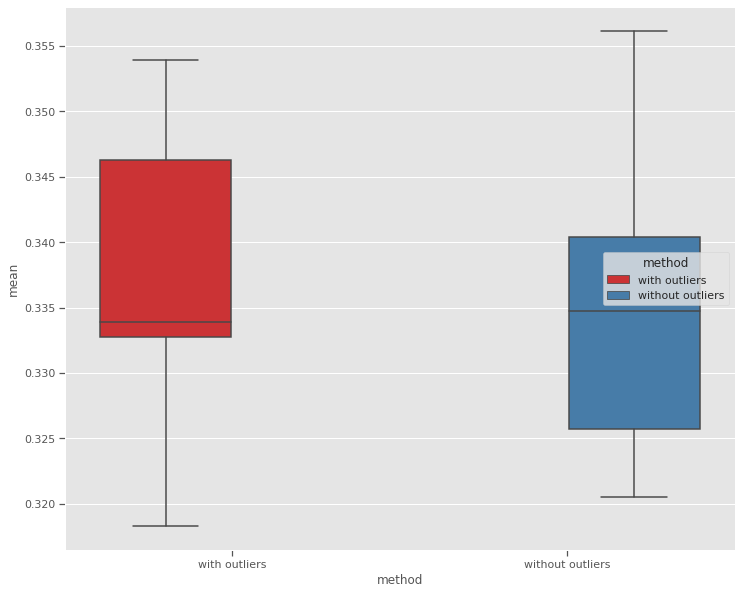

In [39]:
boxplot_results(normal_list, outlier_list)

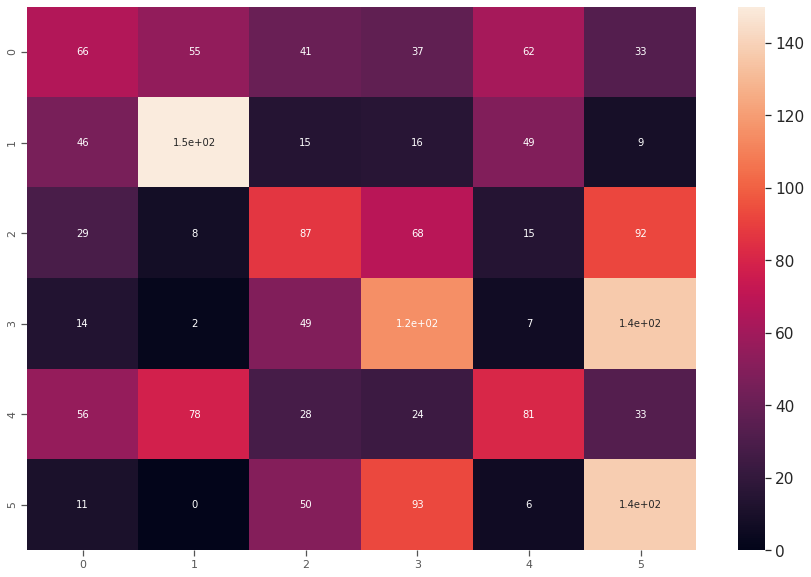

In [40]:
conf_matrix(normal_conf_matrix, normal_list)

### Repeated K-fold 

>1 mean=0.3363 std=0.011
>2 mean=0.3360 std=0.009
>3 mean=0.3355 std=0.010
>4 mean=0.3352 std=0.010
>5 mean=0.3346 std=0.010
>6 mean=0.3348 std=0.010
>7 mean=0.3344 std=0.010
>8 mean=0.3347 std=0.010
>9 mean=0.3348 std=0.010


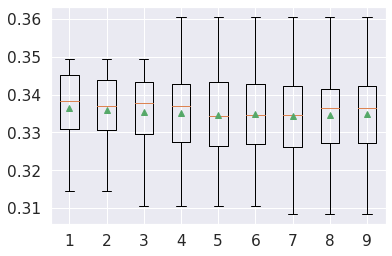

In [41]:
knn = KNeighborsClassifier(**knn_best)
best_score = repeated_KFold(knn, df_all)


In [42]:
best_score

0.3363333333333333

In [43]:

dict_results['knn_kfold_repeated'] = best_score

## Decision Tree

### Modelo baseline

In [44]:
X_train, X_test, y_train, y_test = create_X_y_df(df_all)

print("Modelo baseline")
base_model = DecisionTreeClassifier()
base_model.fit(X_train, y_train)
base_accuracy, base_conf_matrix = evaluate(base_model, X_test, y_test)

dict_results['dtree_baseline'] = base_accuracy

Modelo baseline
Model Performance
Accuracy = 0.29175%.


### Grid Search para achar parâmetros

In [45]:
data = df_all.values
X, y = data[:, :-1], data[:, -1]

param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
dtree = DecisionTreeClassifier()
best_params, best_score = grid_search(dtree, param_grid, 10, X, y)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gin

[CV] END .......................criterion=gini, max_depth=13; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=13; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=13; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=13; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=13; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=13; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=13; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=14; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=14; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=14; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=14; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=14; total time=   0.0s
[CV] END ...................

[CV] END ....................criterion=entropy, max_depth=11; total time=   0.0s
[CV] END ....................criterion=entropy, max_depth=11; total time=   0.0s
[CV] END ....................criterion=entropy, max_depth=11; total time=   0.0s
[CV] END ....................criterion=entropy, max_depth=11; total time=   0.0s
[CV] END ....................criterion=entropy, max_depth=12; total time=   0.0s
[CV] END ....................criterion=entropy, max_depth=12; total time=   0.0s
[CV] END ....................criterion=entropy, max_depth=12; total time=   0.0s
[CV] END ....................criterion=entropy, max_depth=12; total time=   0.0s
[CV] END ....................criterion=entropy, max_depth=12; total time=   0.0s
[CV] END ....................criterion=entropy, max_depth=12; total time=   0.0s
[CV] END ....................criterion=entropy, max_depth=12; total time=   0.0s
[CV] END ....................criterion=entropy, max_depth=12; total time=   0.0s
[CV] END ...................

In [46]:
print(best_params)
dtree_best = best_params

{'criterion': 'gini', 'max_depth': 6}


In [47]:
best_score

0.3327222222222222

### K-Fold com e sem a retirada de outliers

In [48]:
dtree = DecisionTreeClassifier(**dtree_best)  
normal_list, outlier_list, normal_conf_matrix, outlier_conf_matrix = KFolds_outlier(df_all, dtree)

KFold(n_splits=10, random_state=11, shuffle=True)
--------------------------------------------------------
Fold número:  1
Tamanho do X_train antes de remover os outliers: (16200, 2)
Acurácia antes retirada de outliers:  0.33555555555555555
Tamanho do X_train após remover os outliers: (15714, 2)
Acurácia após retirada de outliers:  0.3211111111111111
--------------------------------------------------------
Fold número:  2
Tamanho do X_train antes de remover os outliers: (16200, 2)
Acurácia antes retirada de outliers:  0.3288888888888889
Tamanho do X_train após remover os outliers: (15714, 2)
Acurácia após retirada de outliers:  0.3372222222222222
--------------------------------------------------------
Fold número:  3
Tamanho do X_train antes de remover os outliers: (16200, 2)
Acurácia antes retirada de outliers:  0.33
Tamanho do X_train após remover os outliers: (15714, 2)
Acurácia após retirada de outliers:  0.3227777777777778
--------------------------------------------------------


In [49]:
print(np.amax(normal_list))
print(np.amax(outlier_list))

dict_results['dtree_kfold'] = max(normal_list)
dict_results['dtree_kfold_outlier'] = max(outlier_list)

0.3438888888888889
0.34055555555555556


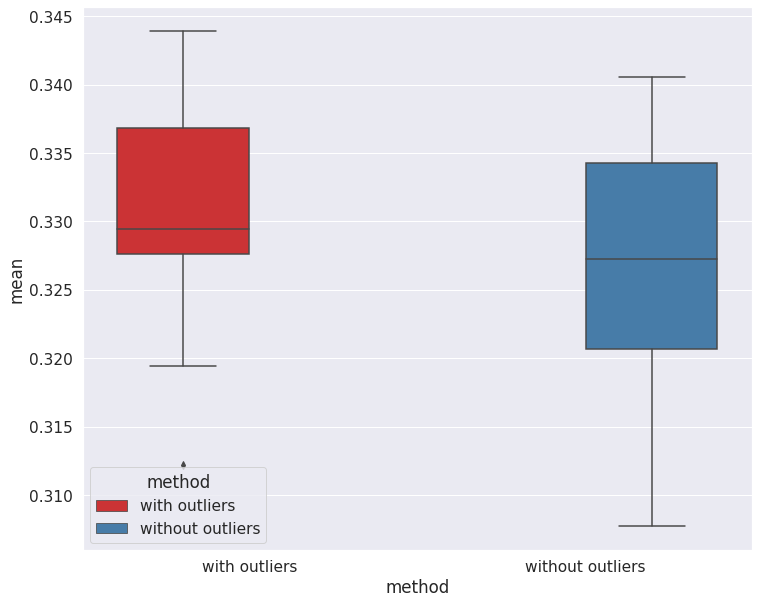

In [50]:
boxplot_results(normal_list, outlier_list)

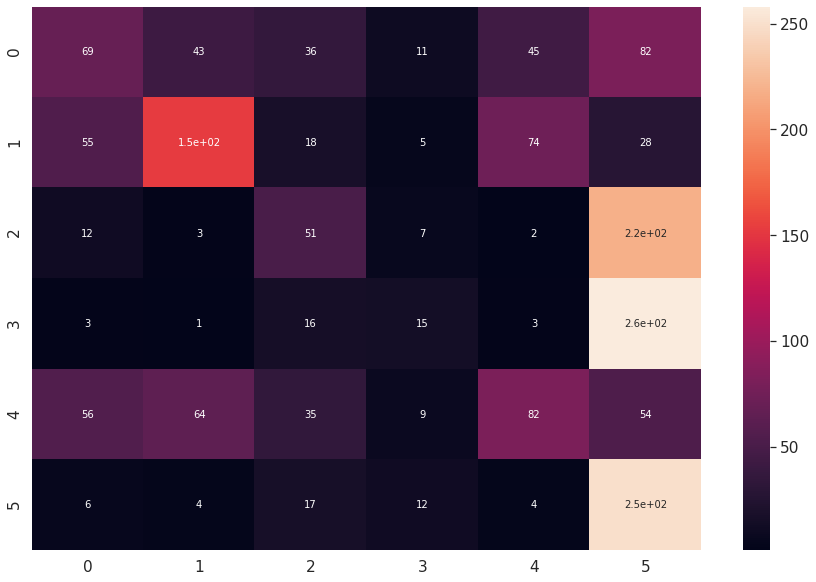

In [51]:
conf_matrix(normal_conf_matrix, normal_list)

### Repeated K-Fold

>1 mean=0.3284 std=0.009
>2 mean=0.3280 std=0.010
>3 mean=0.3276 std=0.010
>4 mean=0.3292 std=0.010
>5 mean=0.3298 std=0.010
>6 mean=0.3305 std=0.011
>7 mean=0.3306 std=0.011
>8 mean=0.3310 std=0.011
>9 mean=0.3310 std=0.011


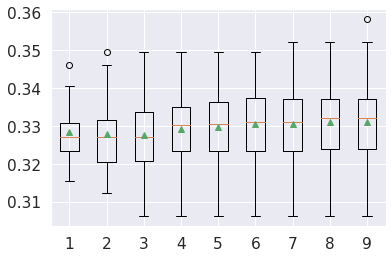

In [52]:
dtree = DecisionTreeClassifier(**dtree_best)
best_score = repeated_KFold(dtree, df_all)

In [53]:
best_score

0.3310138888888889

In [54]:

dict_results['dtree_kfold_repeated'] = best_score

## Random Forest

### Modelo baseline

In [55]:
base_model = RandomForestClassifier(n_estimators = 10, random_state = 11)
base_model.fit(X_train, y_train)
base_accuracy, base_conf_matrix = evaluate(base_model, X_test, y_test)

dict_results['forest_baseline'] = base_accuracy

Model Performance
Accuracy = 0.30168%.


### Random Search para achar parâmetros

Necessário subsampling para realizar a procura por questões de tempo de processamento

In [56]:
n_estimators = [3, 5, 10, 25]
# Number of features to consider at every split
crit = ['gini', 'entropy']
# Maximum number of levels in tree
max_depth = [5,8,9,10,12]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'criterion': crit,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

data = df_all.sample(9000)
print(data.shape)

X_train, X_test, y_train, y_test = create_X_y_df(data)

print(X_train.shape)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state = 11)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 10, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train, y_train)

(9000, 3)
(6030, 2)
Fitting 10 folds for each of 50 candidates, totalling 500 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=11),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 8, 9, 10, 12, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [3, 5, 10, 25]},
                   random_state=42, verbose=2)

In [57]:
rf_random.best_params_

{'n_estimators': 25,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_depth': 5,
 'criterion': 'gini',
 'bootstrap': True}

In [58]:
best_random = rf_random.best_estimator_
random_accuracy, random_conf_matrix = evaluate(best_random, X_test, y_test)

print('Improvement of {:0.5f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Accuracy = 0.32929%.
Improvement of 9.15179%.


### Grid Search para melhorar parâmetros

In [59]:
n_estimators = [5, 10, 25, 50]
# Number of features to consider at every split
crit = ['gini', 'entropy']
# Maximum number of levels in tree
max_depth = [8,9,10]
# Minimum number of samples required to split a node
min_samples_split = [2,5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'criterion': crit,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Create a based model
rf = RandomForestClassifier()# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)

In [60]:
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
grid_accuracy, conf_matrix_grid = evaluate(best_grid, X_test, y_test)

print('Improvement of {:0.5f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Fitting 10 folds for each of 192 candidates, totalling 1920 fits
{'bootstrap': True, 'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Model Performance
Accuracy = 0.32593%.
Improvement of 8.03571%.


In [61]:
forest_best = grid_search.best_params_

In [62]:
zero = df_all.drop_duplicates()

In [63]:
zero.shape

(8922, 3)

In [64]:
df_all.shape

(18000, 3)

### K-Fold com e sem a retirada de outliers

In [65]:
forest = RandomForestClassifier(**forest_best)
normal_list, outlier_list, normal_conf_matrix, outlier_conf_matrix = KFolds_outlier(df_all, forest)

KFold(n_splits=10, random_state=11, shuffle=True)
--------------------------------------------------------
Fold número:  1
Tamanho do X_train antes de remover os outliers: (16200, 2)
Acurácia antes retirada de outliers:  0.3461111111111111
Tamanho do X_train após remover os outliers: (15714, 2)
Acurácia após retirada de outliers:  0.3427777777777778
--------------------------------------------------------
Fold número:  2
Tamanho do X_train antes de remover os outliers: (16200, 2)
Acurácia antes retirada de outliers:  0.3322222222222222
Tamanho do X_train após remover os outliers: (15714, 2)
Acurácia após retirada de outliers:  0.3416666666666667
--------------------------------------------------------
Fold número:  3
Tamanho do X_train antes de remover os outliers: (16200, 2)
Acurácia antes retirada de outliers:  0.3516666666666667
Tamanho do X_train após remover os outliers: (15714, 2)
Acurácia após retirada de outliers:  0.34
--------------------------------------------------------
F

In [66]:
print(np.amax(normal_list))
print(np.amax(outlier_list))

dict_results['forest_kfold'] = np.amax(normal_list)
dict_results['forest_kfold_outlier'] = np.amax(outlier_list)

0.36
0.35444444444444445


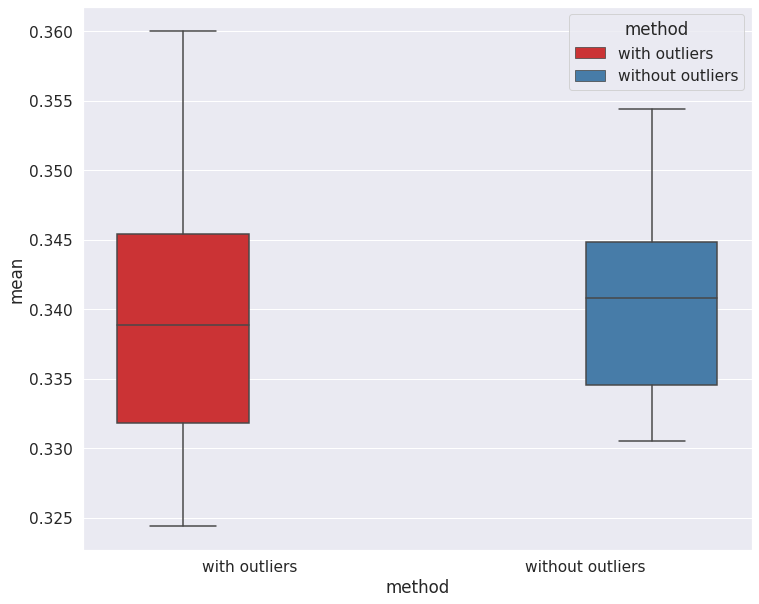

In [67]:
boxplot_results(normal_list, outlier_list)

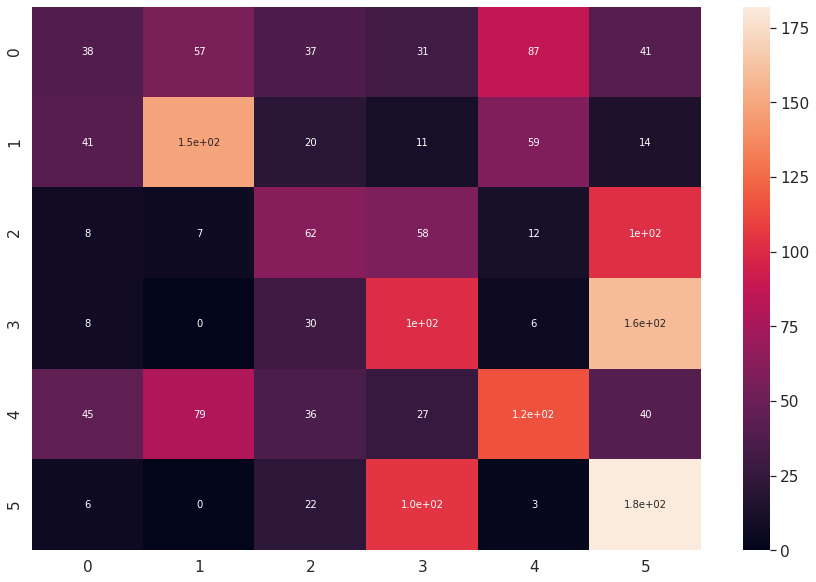

In [68]:
conf_matrix(normal_conf_matrix, normal_list)

### Repeated K-Fold

>1 mean=0.3410 std=0.010
>2 mean=0.3419 std=0.010
>3 mean=0.3416 std=0.011
>4 mean=0.3420 std=0.011
>5 mean=0.3414 std=0.011
>6 mean=0.3421 std=0.010
>7 mean=0.3424 std=0.012
>8 mean=0.3420 std=0.011
>9 mean=0.3431 std=0.012


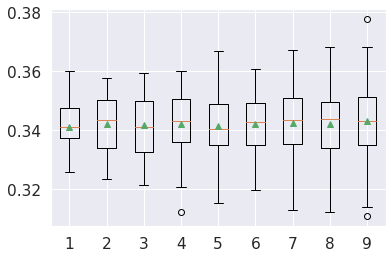

In [69]:
forest = RandomForestClassifier(**forest_best)
best_score = repeated_KFold(forest, df_all)

In [70]:
best_score

0.34310493827160493

In [71]:
dict_results['forest_kfold_repeated'] = best_score

## MLP

### Modelo baseline

In [72]:
X_train, X_test, y_train, y_test = create_X_y_df(df_all)

print("Modelo baseline")
base_model = MLPClassifier()
base_model.fit(X_train, y_train)
base_accuracy, base_conf_matrix = evaluate(base_model, X_test, y_test)

dict_results['mlp_baseline'] = base_accuracy

Modelo baseline
Model Performance
Accuracy = 0.35034%.


In [73]:
def grid_search(model, param_grid, n_folds, X, y):
  #use gridsearch to test all values for n_neighbors
  gscv = GridSearchCV(model, param_grid, cv=n_folds, verbose = 2)
  #fit model to data
  gscv.fit(X, y)
  return gscv.best_params_, gscv.best_score_


### GridSearch para melhorar parâmetros

Necessário subsampling para realizar grid search por motivos de tempo de processamento

In [74]:
data = df_all.sample(9000)
print(data.shape) 
data = data.values
X, y = data[:, :-1], data[:, -1]

(9000, 3)


In [75]:
#hidden_layer_sizes=100, activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

hidden_layer_sizes = [100, 120, 150, 200]
activation = ['identity', 'logistic', 'tanh', 'relu']
solver = ['lbfgs', 'sgd', 'adam']
#max_iter = [400]

param_grid = {'hidden_layer_sizes': hidden_layer_sizes, 'activation': activation, 'solver': solver}
mlp = MLPClassifier()

best_params, best_score = grid_search(mlp, param_grid,10, X,y)


Fitting 10 folds for each of 48 candidates, totalling 480 fits
[CV] END activation=identity, hidden_layer_sizes=100, solver=lbfgs; total time=   0.3s
[CV] END activation=identity, hidden_layer_sizes=100, solver=lbfgs; total time=   0.3s
[CV] END activation=identity, hidden_layer_sizes=100, solver=lbfgs; total time=   0.3s
[CV] END activation=identity, hidden_layer_sizes=100, solver=lbfgs; total time=   0.3s
[CV] END activation=identity, hidden_layer_sizes=100, solver=lbfgs; total time=   0.3s
[CV] END activation=identity, hidden_layer_sizes=100, solver=lbfgs; total time=   0.3s
[CV] END activation=identity, hidden_layer_sizes=100, solver=lbfgs; total time=   0.3s
[CV] END activation=identity, hidden_layer_sizes=100, solver=lbfgs; total time=   0.3s
[CV] END activation=identity, hidden_layer_sizes=100, solver=lbfgs; total time=   0.3s
[CV] END activation=identity, hidden_layer_sizes=100, solver=lbfgs; total time=   0.3s
[CV] END activation=identity, hidden_layer_sizes=100, solver=sgd; t

[CV] END activation=identity, hidden_layer_sizes=200, solver=lbfgs; total time=   0.6s
[CV] END activation=identity, hidden_layer_sizes=200, solver=lbfgs; total time=   0.6s
[CV] END activation=identity, hidden_layer_sizes=200, solver=lbfgs; total time=   0.6s
[CV] END activation=identity, hidden_layer_sizes=200, solver=lbfgs; total time=   0.5s
[CV] END activation=identity, hidden_layer_sizes=200, solver=lbfgs; total time=   0.7s
[CV] END activation=identity, hidden_layer_sizes=200, solver=sgd; total time=   1.1s
[CV] END activation=identity, hidden_layer_sizes=200, solver=sgd; total time=   1.5s
[CV] END activation=identity, hidden_layer_sizes=200, solver=sgd; total time=   0.9s
[CV] END activation=identity, hidden_layer_sizes=200, solver=sgd; total time=   0.9s
[CV] END activation=identity, hidden_layer_sizes=200, solver=sgd; total time=   0.8s
[CV] END activation=identity, hidden_layer_sizes=200, solver=sgd; total time=   0.9s
[CV] END activation=identity, hidden_layer_sizes=200, s

/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, hidden_layer_sizes=100, solver=lbfgs; total time=  14.6s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, hidden_layer_sizes=100, solver=lbfgs; total time=  12.5s
[CV] END activation=logistic, hidden_layer_sizes=100, solver=lbfgs; total time=   0.9s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, hidden_layer_sizes=100, solver=lbfgs; total time=  11.6s
[CV] END activation=logistic, hidden_layer_sizes=100, solver=lbfgs; total time=   1.5s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, hidden_layer_sizes=100, solver=lbfgs; total time=  12.1s
[CV] END activation=logistic, hidden_layer_sizes=100, solver=lbfgs; total time=   1.3s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, hidden_layer_sizes=100, solver=lbfgs; total time=  12.1s
[CV] END activation=logistic, hidden_layer_sizes=100, solver=lbfgs; total time=   1.5s
[CV] END activation=logistic, hidden_layer_sizes=100, solver=lbfgs; total time=   1.5s
[CV] END activation=logistic, hidden_layer_sizes=100, solver=sgd; total time=   0.6s
[CV] END activation=logistic, hidden_layer_sizes=100, solver=sgd; total time=   0.6s
[CV] END activation=logistic, hidden_layer_sizes=100, solver=sgd; total time=   0.6s
[CV] END activation=logistic, hidden_layer_sizes=100, solver=sgd; total time=   0.5s
[CV] END activation=logistic, hidden_layer_sizes=100, solver=sgd; total time=   0.6s
[CV] END activation=logistic, hidden_layer_sizes=100, solver=sgd; total time=   0.6s
[CV] END activation=logistic, hidden_layer_sizes=100, solver=sgd; total time=   0.5s
[CV] END activation=logistic, hidden_layer_sizes=100, solver=sgd; total time=   0.6s
[CV] END activation=logistic, hidden_layer_sizes=100, solve

[CV] END activation=logistic, hidden_layer_sizes=200, solver=sgd; total time=   0.9s
[CV] END activation=logistic, hidden_layer_sizes=200, solver=sgd; total time=   1.0s
[CV] END activation=logistic, hidden_layer_sizes=200, solver=sgd; total time=   1.2s
[CV] END activation=logistic, hidden_layer_sizes=200, solver=sgd; total time=   0.8s
[CV] END activation=logistic, hidden_layer_sizes=200, solver=sgd; total time=   0.9s
[CV] END activation=logistic, hidden_layer_sizes=200, solver=sgd; total time=   0.9s
[CV] END activation=logistic, hidden_layer_sizes=200, solver=sgd; total time=   1.1s
[CV] END activation=logistic, hidden_layer_sizes=200, solver=adam; total time=   2.2s
[CV] END activation=logistic, hidden_layer_sizes=200, solver=adam; total time=   1.1s
[CV] END activation=logistic, hidden_layer_sizes=200, solver=adam; total time=   1.2s
[CV] END activation=logistic, hidden_layer_sizes=200, solver=adam; total time=   1.0s
[CV] END activation=logistic, hidden_layer_sizes=200, solver=

/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=100, solver=lbfgs; total time=  16.7s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=100, solver=lbfgs; total time=  17.5s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=100, solver=lbfgs; total time=  16.9s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=100, solver=lbfgs; total time=  18.0s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=100, solver=lbfgs; total time=  17.2s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=100, solver=lbfgs; total time=  17.8s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=100, solver=lbfgs; total time=  17.5s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=100, solver=lbfgs; total time=  18.0s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=100, solver=lbfgs; total time=  17.4s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=100, solver=lbfgs; total time=  17.3s
[CV] END activation=tanh, hidden_layer_sizes=100, solver=sgd; total time=   1.9s
[CV] END activation=tanh, hidden_layer_sizes=100, solver=sgd; total time=   1.1s
[CV] END activation=tanh, hidden_layer_sizes=100, solver=sgd; total time=   1.4s
[CV] END activation=tanh, hidden_layer_sizes=100, solver=sgd; total time=   1.5s
[CV] END activation=tanh, hidden_layer_sizes=100, solver=sgd; total time=   2.1s
[CV] END activation=tanh, hidden_layer_sizes=100, solver=sgd; total time=   1.2s
[CV] END activation=tanh, hidden_layer_sizes=100, solver=sgd; total time=   1.5s
[CV] END activation=tanh, hidden_layer_sizes=100, solver=sgd; total time=   2.0s
[CV] END activation=tanh, hidden_layer_sizes=100, solver=sgd; total time=   1.5s
[CV] END activation=tanh, hidden_layer_sizes=100, solver=sgd; total time=   1.8s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=100, solver=adam; total time=   9.7s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=100, solver=adam; total time=  10.5s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=100, solver=adam; total time=  10.4s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=100, solver=adam; total time=  10.7s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=100, solver=adam; total time=   9.5s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=100, solver=adam; total time=   9.4s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=100, solver=adam; total time=   9.5s
[CV] END activation=tanh, hidden_layer_sizes=100, solver=adam; total time=   9.4s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=100, solver=adam; total time=   9.4s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=100, solver=adam; total time=   9.4s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=120, solver=lbfgs; total time=  19.2s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=120, solver=lbfgs; total time=  19.0s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=120, solver=lbfgs; total time=  20.1s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=120, solver=lbfgs; total time=  19.5s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=120, solver=lbfgs; total time=  19.8s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=120, solver=lbfgs; total time=  19.8s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=120, solver=lbfgs; total time=  19.2s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=120, solver=lbfgs; total time=  19.7s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=120, solver=lbfgs; total time=  19.7s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=120, solver=lbfgs; total time=  20.0s
[CV] END activation=tanh, hidden_layer_sizes=120, solver=sgd; total time=   1.2s
[CV] END activation=tanh, hidden_layer_sizes=120, solver=sgd; total time=   1.9s
[CV] END activation=tanh, hidden_layer_sizes=120, solver=sgd; total time=   1.4s
[CV] END activation=tanh, hidden_layer_sizes=120, solver=sgd; total time=   1.4s
[CV] END activation=tanh, hidden_layer_sizes=120, solver=sgd; total time=   2.2s
[CV] END activation=tanh, hidden_layer_sizes=120, solver=sgd; total time=   1.3s
[CV] END activation=tanh, hidden_layer_sizes=120, solver=sgd; total time=   1.6s
[CV] END activation=tanh, hidden_layer_sizes=120, solver=sgd; total time=   1.7s
[CV] END activation=tanh, hidden_layer_sizes=120, solver=sgd; total time=   1.7s
[CV] END activation=tanh, hidden_layer_sizes=120, solver=sgd; total time=   1.3s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=120, solver=adam; total time=  10.3s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=120, solver=adam; total time=  10.3s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=120, solver=adam; total time=  10.6s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=120, solver=adam; total time=  10.5s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=120, solver=adam; total time=  10.5s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=120, solver=adam; total time=  10.5s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=120, solver=adam; total time=  10.5s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=120, solver=adam; total time=  10.4s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=120, solver=adam; total time=  10.5s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=120, solver=adam; total time=  10.6s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=150, solver=lbfgs; total time=  22.7s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=150, solver=lbfgs; total time=  23.0s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=150, solver=lbfgs; total time=  23.9s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=150, solver=lbfgs; total time=  23.8s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=150, solver=lbfgs; total time=  23.4s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=150, solver=lbfgs; total time=  23.3s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=150, solver=lbfgs; total time=  23.0s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=150, solver=lbfgs; total time=  24.0s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=150, solver=lbfgs; total time=  24.8s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=150, solver=lbfgs; total time=  25.1s
[CV] END activation=tanh, hidden_layer_sizes=150, solver=sgd; total time=   2.0s
[CV] END activation=tanh, hidden_layer_sizes=150, solver=sgd; total time=   1.7s
[CV] END activation=tanh, hidden_layer_sizes=150, solver=sgd; total time=   1.4s
[CV] END activation=tanh, hidden_layer_sizes=150, solver=sgd; total time=   1.3s
[CV] END activation=tanh, hidden_layer_sizes=150, solver=sgd; total time=   1.4s
[CV] END activation=tanh, hidden_layer_sizes=150, solver=sgd; total time=   2.9s
[CV] END activation=tanh, hidden_layer_sizes=150, solver=sgd; total time=   1.7s
[CV] END activation=tanh, hidden_layer_sizes=150, solver=sgd; total time=   3.0s
[CV] END activation=tanh, hidden_layer_sizes=150, solver=sgd; total time=   1.9s
[CV] END activation=tanh, hidden_layer_sizes=150, solver=sgd; total time=   2.3s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=150, solver=adam; total time=  12.3s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=150, solver=adam; total time=  12.3s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=150, solver=adam; total time=  12.2s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=150, solver=adam; total time=  12.1s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=150, solver=adam; total time=  12.3s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=150, solver=adam; total time=  12.1s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=150, solver=adam; total time=  12.2s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=150, solver=adam; total time=  12.4s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=150, solver=adam; total time=  12.2s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=150, solver=adam; total time=  12.2s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=200, solver=lbfgs; total time=  31.3s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=200, solver=lbfgs; total time=  30.4s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=200, solver=lbfgs; total time=  30.4s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=200, solver=lbfgs; total time=  31.3s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=200, solver=lbfgs; total time=  31.2s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=200, solver=lbfgs; total time=  30.6s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=200, solver=lbfgs; total time=  30.5s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=200, solver=lbfgs; total time=  31.0s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=200, solver=lbfgs; total time=  30.2s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, hidden_layer_sizes=200, solver=lbfgs; total time=  30.6s
[CV] END activation=tanh, hidden_layer_sizes=200, solver=sgd; total time=   2.0s
[CV] END activation=tanh, hidden_layer_sizes=200, solver=sgd; total time=   1.5s
[CV] END activation=tanh, hidden_layer_sizes=200, solver=sgd; total time=   1.6s
[CV] END activation=tanh, hidden_layer_sizes=200, solver=sgd; total time=   1.9s
[CV] END activation=tanh, hidden_layer_sizes=200, solver=sgd; total time=   1.5s
[CV] END activation=tanh, hidden_layer_sizes=200, solver=sgd; total time=   1.6s
[CV] END activation=tanh, hidden_layer_sizes=200, solver=sgd; total time=   1.5s
[CV] END activation=tanh, hidden_layer_sizes=200, solver=sgd; total time=   1.6s
[CV] END activation=tanh, hidden_layer_sizes=200, solver=sgd; total time=   1.8s
[CV] END activation=tanh, hidden_layer_sizes=200, solver=sgd; total time=   1.7s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=200, solver=adam; total time=  14.7s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=200, solver=adam; total time=  14.5s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=200, solver=adam; total time=  14.5s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=200, solver=adam; total time=  14.4s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=200, solver=adam; total time=  14.5s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=200, solver=adam; total time=  14.5s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=200, solver=adam; total time=  14.5s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=200, solver=adam; total time=  14.5s
[CV] END activation=tanh, hidden_layer_sizes=200, solver=adam; total time=  13.8s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=200, solver=adam; total time=  14.6s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, hidden_layer_sizes=100, solver=lbfgs; total time=   7.2s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, hidden_layer_sizes=100, solver=lbfgs; total time=   7.9s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, hidden_layer_sizes=100, solver=lbfgs; total time=   7.1s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, hidden_layer_sizes=100, solver=lbfgs; total time=   7.1s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, hidden_layer_sizes=100, solver=lbfgs; total time=   6.7s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, hidden_layer_sizes=100, solver=lbfgs; total time=   6.5s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, hidden_layer_sizes=100, solver=lbfgs; total time=   7.0s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, hidden_layer_sizes=100, solver=lbfgs; total time=   7.2s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, hidden_layer_sizes=100, solver=lbfgs; total time=   7.4s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, hidden_layer_sizes=100, solver=lbfgs; total time=   7.3s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=100, solver=sgd; total time=   6.3s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=100, solver=sgd; total time=   6.1s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=100, solver=sgd; total time=   6.2s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=100, solver=sgd; total time=   6.1s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=100, solver=sgd; total time=   6.1s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=100, solver=sgd; total time=   6.2s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=100, solver=sgd; total time=   6.2s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=100, solver=sgd; total time=   6.2s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=100, solver=sgd; total time=   6.1s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=100, solver=sgd; total time=   6.2s
[CV] END activation=relu, hidden_layer_sizes=100, solver=adam; total time=   4.6s
[CV] END activation=relu, hidden_layer_sizes=100, solver=adam; total time=   3.4s
[CV] END activation=relu, hidden_layer_sizes=100, solver=adam; total time=   3.3s
[CV] END activation=relu, hidden_layer_sizes=100, solver=adam; total time=   3.7s
[CV] END activation=relu, hidden_layer_sizes=100, solver=adam; total time=   5.3s
[CV] END activation=relu, hidden_layer_sizes=100, solver=adam; total time=   4.9s
[CV] END activation=relu, hidden_layer_sizes=100, solver=adam; total time=   4.7s
[CV] END activation=relu, hidden_layer_sizes=100, solver=adam; total time=   4.6s
[CV] END activation=relu, hidden_layer_sizes=100, solver=adam; total time=   4.7s
[CV] END activation=relu, hidden_layer_sizes=100, solver=adam; total time=   4.8s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, hidden_layer_sizes=120, solver=lbfgs; total time=   7.9s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, hidden_layer_sizes=120, solver=lbfgs; total time=   7.9s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, hidden_layer_sizes=120, solver=lbfgs; total time=   8.4s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, hidden_layer_sizes=120, solver=lbfgs; total time=   8.3s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, hidden_layer_sizes=120, solver=lbfgs; total time=   7.9s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, hidden_layer_sizes=120, solver=lbfgs; total time=   8.9s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, hidden_layer_sizes=120, solver=lbfgs; total time=   8.2s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, hidden_layer_sizes=120, solver=lbfgs; total time=   8.3s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, hidden_layer_sizes=120, solver=lbfgs; total time=   8.1s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, hidden_layer_sizes=120, solver=lbfgs; total time=   8.7s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=120, solver=sgd; total time=   6.8s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=120, solver=sgd; total time=   6.8s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=120, solver=sgd; total time=   6.8s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=120, solver=sgd; total time=   6.7s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=120, solver=sgd; total time=   6.9s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=120, solver=sgd; total time=   6.8s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=120, solver=sgd; total time=   6.8s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=120, solver=sgd; total time=   6.8s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=120, solver=sgd; total time=   6.8s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=120, solver=sgd; total time=   6.6s
[CV] END activation=relu, hidden_layer_sizes=120, solver=adam; total time=   6.4s
[CV] END activation=relu, hidden_layer_sizes=120, solver=adam; total time=   3.5s
[CV] END activation=relu, hidden_layer_sizes=120, solver=adam; total time=   4.3s
[CV] END activation=relu, hidden_layer_sizes=120, solver=adam; total time=   5.2s
[CV] END activation=relu, hidden_layer_sizes=120, solver=adam; total time=   4.9s
[CV] END activation=relu, hidden_layer_sizes=120, solver=adam; total time=   4.1s
[CV] END activation=relu, hidden_layer_sizes=120, solver=adam; total time=   5.2s
[CV] END activation=relu, hidden_layer_sizes=120, solver=adam; total time=   5.1s
[CV] END activation=relu, hidden_layer_sizes=120, solver=adam; total time=   4.2s
[CV] END activation=relu, hidden_layer_sizes=120, solver=adam; total time=   4.9s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, hidden_layer_sizes=150, solver=lbfgs; total time=   9.3s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, hidden_layer_sizes=150, solver=lbfgs; total time=   9.6s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, hidden_layer_sizes=150, solver=lbfgs; total time=   9.2s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, hidden_layer_sizes=150, solver=lbfgs; total time=   9.9s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, hidden_layer_sizes=150, solver=lbfgs; total time=  10.2s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, hidden_layer_sizes=150, solver=lbfgs; total time=   9.7s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, hidden_layer_sizes=150, solver=lbfgs; total time=   9.8s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, hidden_layer_sizes=150, solver=lbfgs; total time=  10.0s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, hidden_layer_sizes=150, solver=lbfgs; total time=  10.1s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, hidden_layer_sizes=150, solver=lbfgs; total time=  10.3s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=150, solver=sgd; total time=   7.8s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=150, solver=sgd; total time=   7.6s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=150, solver=sgd; total time=   7.8s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=150, solver=sgd; total time=   7.8s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=150, solver=sgd; total time=   7.7s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=150, solver=sgd; total time=   7.6s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=150, solver=sgd; total time=   7.8s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=150, solver=sgd; total time=   7.6s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=150, solver=sgd; total time=   7.8s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=150, solver=sgd; total time=   7.6s
[CV] END activation=relu, hidden_layer_sizes=150, solver=adam; total time=   4.8s
[CV] END activation=relu, hidden_layer_sizes=150, solver=adam; total time=   3.3s
[CV] END activation=relu, hidden_layer_sizes=150, solver=adam; total time=   3.8s
[CV] END activation=relu, hidden_layer_sizes=150, solver=adam; total time=   5.0s
[CV] END activation=relu, hidden_layer_sizes=150, solver=adam; total time=   4.1s
[CV] END activation=relu, hidden_layer_sizes=150, solver=adam; total time=   4.0s
[CV] END activation=relu, hidden_layer_sizes=150, solver=adam; total time=   4.3s
[CV] END activation=relu, hidden_layer_sizes=150, solver=adam; total time=   4.4s
[CV] END activation=relu, hidden_layer_sizes=150, solver=adam; total time=   4.6s
[CV] END activation=relu, hidden_layer_sizes=150, solver=adam; total time=   5.2s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, hidden_layer_sizes=200, solver=lbfgs; total time=  12.4s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, hidden_layer_sizes=200, solver=lbfgs; total time=  12.2s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, hidden_layer_sizes=200, solver=lbfgs; total time=  12.7s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, hidden_layer_sizes=200, solver=lbfgs; total time=  12.4s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, hidden_layer_sizes=200, solver=lbfgs; total time=  13.0s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, hidden_layer_sizes=200, solver=lbfgs; total time=  12.9s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, hidden_layer_sizes=200, solver=lbfgs; total time=  13.0s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, hidden_layer_sizes=200, solver=lbfgs; total time=  12.8s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, hidden_layer_sizes=200, solver=lbfgs; total time=  13.1s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, hidden_layer_sizes=200, solver=lbfgs; total time=  13.4s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=200, solver=sgd; total time=   9.0s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=200, solver=sgd; total time=   9.2s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=200, solver=sgd; total time=   9.1s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=200, solver=sgd; total time=   9.1s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=200, solver=sgd; total time=   9.4s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=200, solver=sgd; total time=   9.2s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=200, solver=sgd; total time=   9.2s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=200, solver=sgd; total time=   9.1s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=200, solver=sgd; total time=   9.1s


/home/dell/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=200, solver=sgd; total time=   9.2s
[CV] END activation=relu, hidden_layer_sizes=200, solver=adam; total time=   4.9s
[CV] END activation=relu, hidden_layer_sizes=200, solver=adam; total time=   5.0s
[CV] END activation=relu, hidden_layer_sizes=200, solver=adam; total time=   7.7s
[CV] END activation=relu, hidden_layer_sizes=200, solver=adam; total time=   6.1s
[CV] END activation=relu, hidden_layer_sizes=200, solver=adam; total time=   6.6s
[CV] END activation=relu, hidden_layer_sizes=200, solver=adam; total time=   5.6s
[CV] END activation=relu, hidden_layer_sizes=200, solver=adam; total time=   7.5s
[CV] END activation=relu, hidden_layer_sizes=200, solver=adam; total time=   5.5s
[CV] END activation=relu, hidden_layer_sizes=200, solver=adam; total time=   5.1s
[CV] END activation=relu, hidden_layer_sizes=200, solver=adam; total time=   4.3s


In [76]:
best_score

0.353

In [77]:
mlp_best = best_params
best_params

{'activation': 'relu', 'hidden_layer_sizes': 120, 'solver': 'adam'}

### K-Fold com e sem a retirada de outliers

In [78]:
mlp = MLPClassifier(**mlp_best)
normal_list, outlier_list, normal_conf_matrix, outlier_conf_matrix = KFolds_outlier(df_all, mlp)

KFold(n_splits=10, random_state=11, shuffle=True)
--------------------------------------------------------
Fold número:  1
Tamanho do X_train antes de remover os outliers: (16200, 2)
Acurácia antes retirada de outliers:  0.3477777777777778
Tamanho do X_train após remover os outliers: (15714, 2)
Acurácia após retirada de outliers:  0.3422222222222222
--------------------------------------------------------
Fold número:  2
Tamanho do X_train antes de remover os outliers: (16200, 2)
Acurácia antes retirada de outliers:  0.32944444444444443
Tamanho do X_train após remover os outliers: (15714, 2)
Acurácia após retirada de outliers:  0.32722222222222225
--------------------------------------------------------
Fold número:  3
Tamanho do X_train antes de remover os outliers: (16200, 2)
Acurácia antes retirada de outliers:  0.3611111111111111
Tamanho do X_train após remover os outliers: (15714, 2)
Acurácia após retirada de outliers:  0.3605555555555556
------------------------------------------

In [79]:
print(np.amax(normal_list))
print(np.amax(outlier_list))

dict_results['mlp_kfold'] = np.amax(normal_list)
dict_results['mlp_kfold_outlier'] = np.amax(outlier_list)

0.3638888888888889
0.3605555555555556


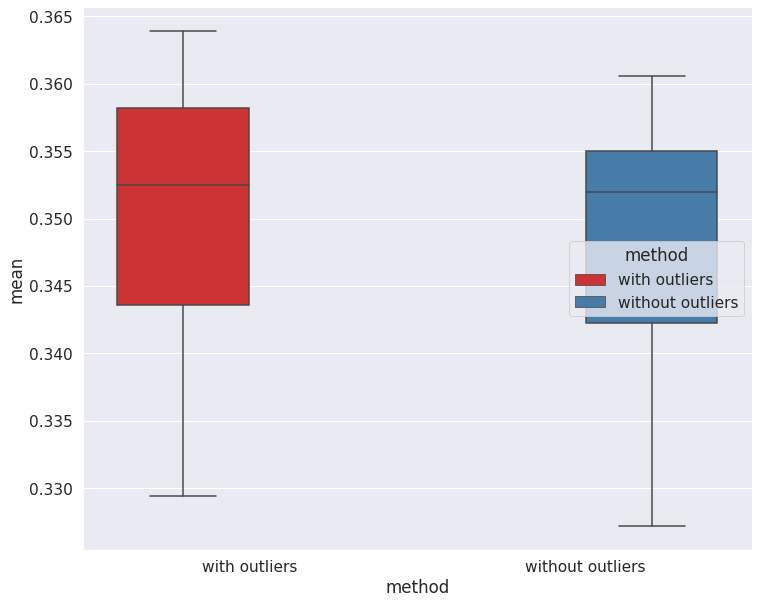

In [80]:
boxplot_results(normal_list, outlier_list)

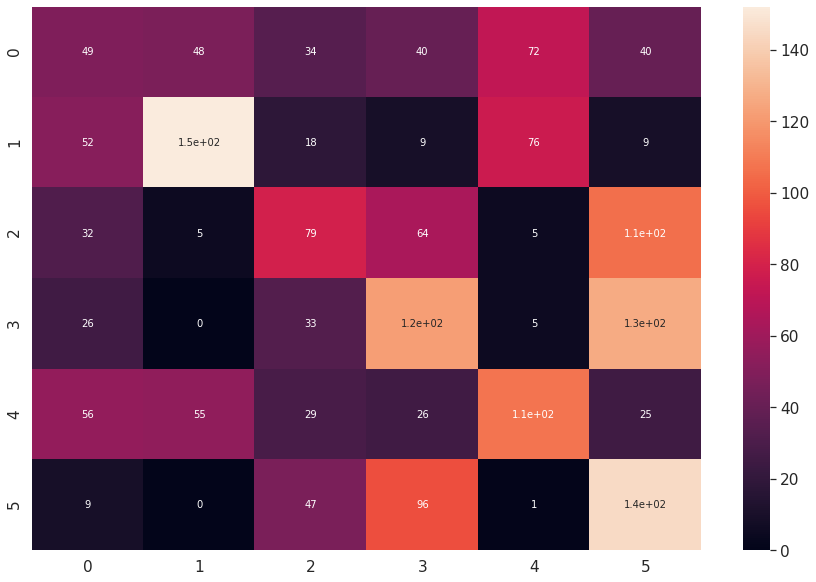

In [81]:
conf_matrix(normal_conf_matrix, normal_list)

### Repeated K-Fold

>1 mean=0.3466 std=0.009
>2 mean=0.3494 std=0.010
>3 mean=0.3488 std=0.012
>4 mean=0.3481 std=0.010
>5 mean=0.3481 std=0.010
>6 mean=0.3481 std=0.011
>7 mean=0.3487 std=0.011
>8 mean=0.3477 std=0.010
>9 mean=0.3491 std=0.011


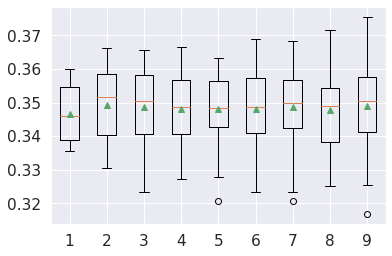

In [82]:
mlp = MLPClassifier(**mlp_best)
best_score = repeated_KFold(mlp, df_all)

In [83]:
best_score

0.3493611111111111

In [84]:
dict_results['mlp_kfold_repeated'] = best_score

## Ensemble: Neural Networks

(9000, 3)
>mlp-nn 0.340 (0.013)
>mlp-nn1 0.331 (0.013)
>mlp-nn2 0.344 (0.015)
>stacking 0.340 (0.012)


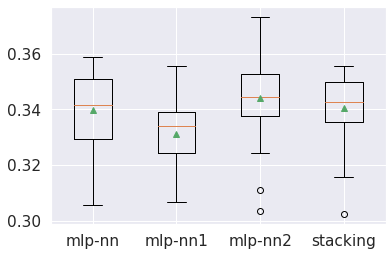

In [85]:

import warnings
warnings.filterwarnings('ignore')
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot

seed = 11
SEED = 11
np.random.seed(seed)

data = df_all.sample(9000)
print(data.shape) 
data = data.values
X, y = data[:, :-1], data[:, -1]

def get_stacking():
  nn = MLPClassifier(hidden_layer_sizes = 120, solver = 'lbfgs', early_stopping=False, random_state=SEED)
  nn1 = MLPClassifier(hidden_layer_sizes = 150, solver = 'sgd', early_stopping=False, random_state=SEED)
  nn2 = MLPClassifier(hidden_layer_sizes = 100, solver= 'adam', early_stopping=False, random_state=SEED)

  # Definindo os modelos base do stacking
  level0 = list()
  level0.append(('nn', nn))
  level0.append(('nn1', nn1))
  level0.append(('nn2', nn2))
	# definindo o modelo meta learner 
  level1 = LogisticRegression()
  # definindo o ensemble
  model = StackingClassifier(estimators=level0, final_estimator=level1, cv=10)
  return model
 

# função retorna os modelos a serem avaliados
def get_models():
  nn = MLPClassifier(hidden_layer_sizes = 120, solver = 'lbfgs', early_stopping=False, random_state=SEED)
  nn1 = MLPClassifier(hidden_layer_sizes = 150, solver = 'sgd', early_stopping=False, random_state=SEED)
  nn2 = MLPClassifier(hidden_layer_sizes = 100, solver= 'adam', early_stopping=False, random_state=SEED)

  models = dict()
  models['mlp-nn'] = nn
  models['mlp-nn1'] = nn1
  models['mlp-nn2'] = nn2
  models['stacking'] = get_stacking()
  return models
 
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

models = get_models()

results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

## Ensemble: modelos criados anteriormente




(9000, 3)
>mlp-nn 0.353 (0.016)
>knn 0.337 (0.014)
>dtree 0.338 (0.013)
>forest 0.344 (0.012)
>stacking 0.346 (0.013)


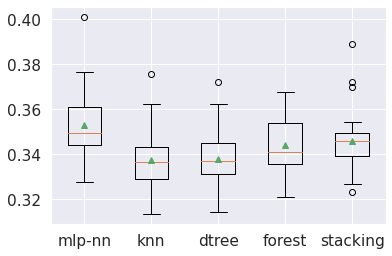

In [86]:
data = df_all.sample(9000)
print(data.shape) 
data = data.values
X, y = data[:, :-1], data[:, -1]

def get_stacking():
  mlp = MLPClassifier(**mlp_best, early_stopping=False, random_state=seed)
  forest = RandomForestClassifier(**forest_best)
  dtree = DecisionTreeClassifier(**dtree_best)
  knn = KNeighborsClassifier(**knn_best)

  # Definindo os modelos base do stacking
  level0 = list()
  level0.append(('mlp-nn', mlp))
  level0.append(('knn', knn))
  level0.append(('dtree', dtree))
  level0.append(('forest', forest))
  
	# definindo o modelo meta learner 
  level1 = LogisticRegression()
  # definindo o ensemble
  model = StackingClassifier(estimators=level0, final_estimator=level1, cv=10)
  return model
 

# função retorna os modelos a serem avaliados
def get_models():
  mlp = MLPClassifier(**mlp_best, early_stopping=False, random_state=seed)
  forest = RandomForestClassifier(**forest_best)
  dtree = DecisionTreeClassifier(**dtree_best)
  knn = KNeighborsClassifier(**knn_best)

  models = dict()
  models['mlp-nn'] = mlp
  models['knn'] = knn
  models['dtree'] = dtree
  models['forest'] = forest
  models['stacking'] = get_stacking()
  return models
 
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

models = get_models()

results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [92]:
for key, value in dict_results.items():
    print("{} : {}".format(key,value))

knn_baseline : 0.2942760942760943
knn_kfold : 0.35388888888888886
knn_kfold_outlier : 0.3561111111111111
knn_kfold_repeated : 0.3363333333333333
dtree_baseline : 0.29175084175084176
dtree_kfold : 0.3438888888888889
dtree_kfold_outlier : 0.34055555555555556
dtree_kfold_repeated : 0.3310138888888889
forest_baseline : 0.30168350168350166
forest_kfold : 0.36
forest_kfold_outlier : 0.35444444444444445
forest_kfold_repeated : 0.34310493827160493
mlp_baseline : 0.35033670033670034
mlp_kfold : 0.3638888888888889
mlp_kfold_outlier : 0.3605555555555556
mlp_kfold_repeated : 0.3493611111111111


In [93]:
min(dict_results.values())

0.29175084175084176

In [94]:
max(dict_results.values())

0.3638888888888889